<h1><center> Car price prediction </center></h1>

# Introduction

This dataset has been found in Kaggle : https://www.kaggle.com/datasets/CooperUnion/cardataset?resource=download . However, it has been originally scraped. We have 11 914 car samples.

In this project, I will train 3 Machine Learning algorithm namely Multiple Linear Regression, Random Forest, and XG Boost to predict the price of used cars.

- Input : 
    - Make
    - Model
    - Year
    - Engine fuel type
    - Engine HP
    - Engine Cylinders
    - Transmission type
    - Driven Wheels
    - Number of doors
    - Market Category
    - Vehicule Size
    - Vehicule style
    - HighWay MPG
    - City MPG
    - Popularity
- Target : 
    - MSRP



# Import libraries & Data set

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
import math

In [3]:
#Import data
path = 'C:/Users/33646/Documents/GitHub/Portefolio/Personnal-Project/Car_Price_prediction/cars_data.csv'
df = pd.read_csv(path)

# Exploratory data analysis

In [4]:
#Check data
df


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
print("The dataframe contains",df.shape[0],"rows and",df.shape[1],"columns\n")

The dataframe contains 11914 rows and 16 columns



In [6]:
#check the data types
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
#check the missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
#drop the missing values
df = df.dropna()

In [9]:
#obtain the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   object 
 1   Model              8084 non-null   object 
 2   Year               8084 non-null   int64  
 3   Engine Fuel Type   8084 non-null   object 
 4   Engine HP          8084 non-null   float64
 5   Engine Cylinders   8084 non-null   float64
 6   Transmission Type  8084 non-null   object 
 7   Driven_Wheels      8084 non-null   object 
 8   Number of Doors    8084 non-null   float64
 9   Market Category    8084 non-null   object 
 10  Vehicle Size       8084 non-null   object 
 11  Vehicle Style      8084 non-null   object 
 12  highway MPG        8084 non-null   int64  
 13  city mpg           8084 non-null   int64  
 14  Popularity         8084 non-null   int64  
 15  MSRP               8084 non-null   int64  
dtypes: float64(3), int64(5)

In [10]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,2012.058634,274.642751,5.778080,3.414151,26.650915,19.553686,1499.397823,5.007267e+04
std,6.317981,115.003475,1.886088,0.898087,7.720473,7.159964,1413.855615,7.029313e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2010.000000,192.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.591875e+04
50%,2015.000000,264.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,3.500500e+04
75%,2016.000000,320.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.872250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Data visualization :

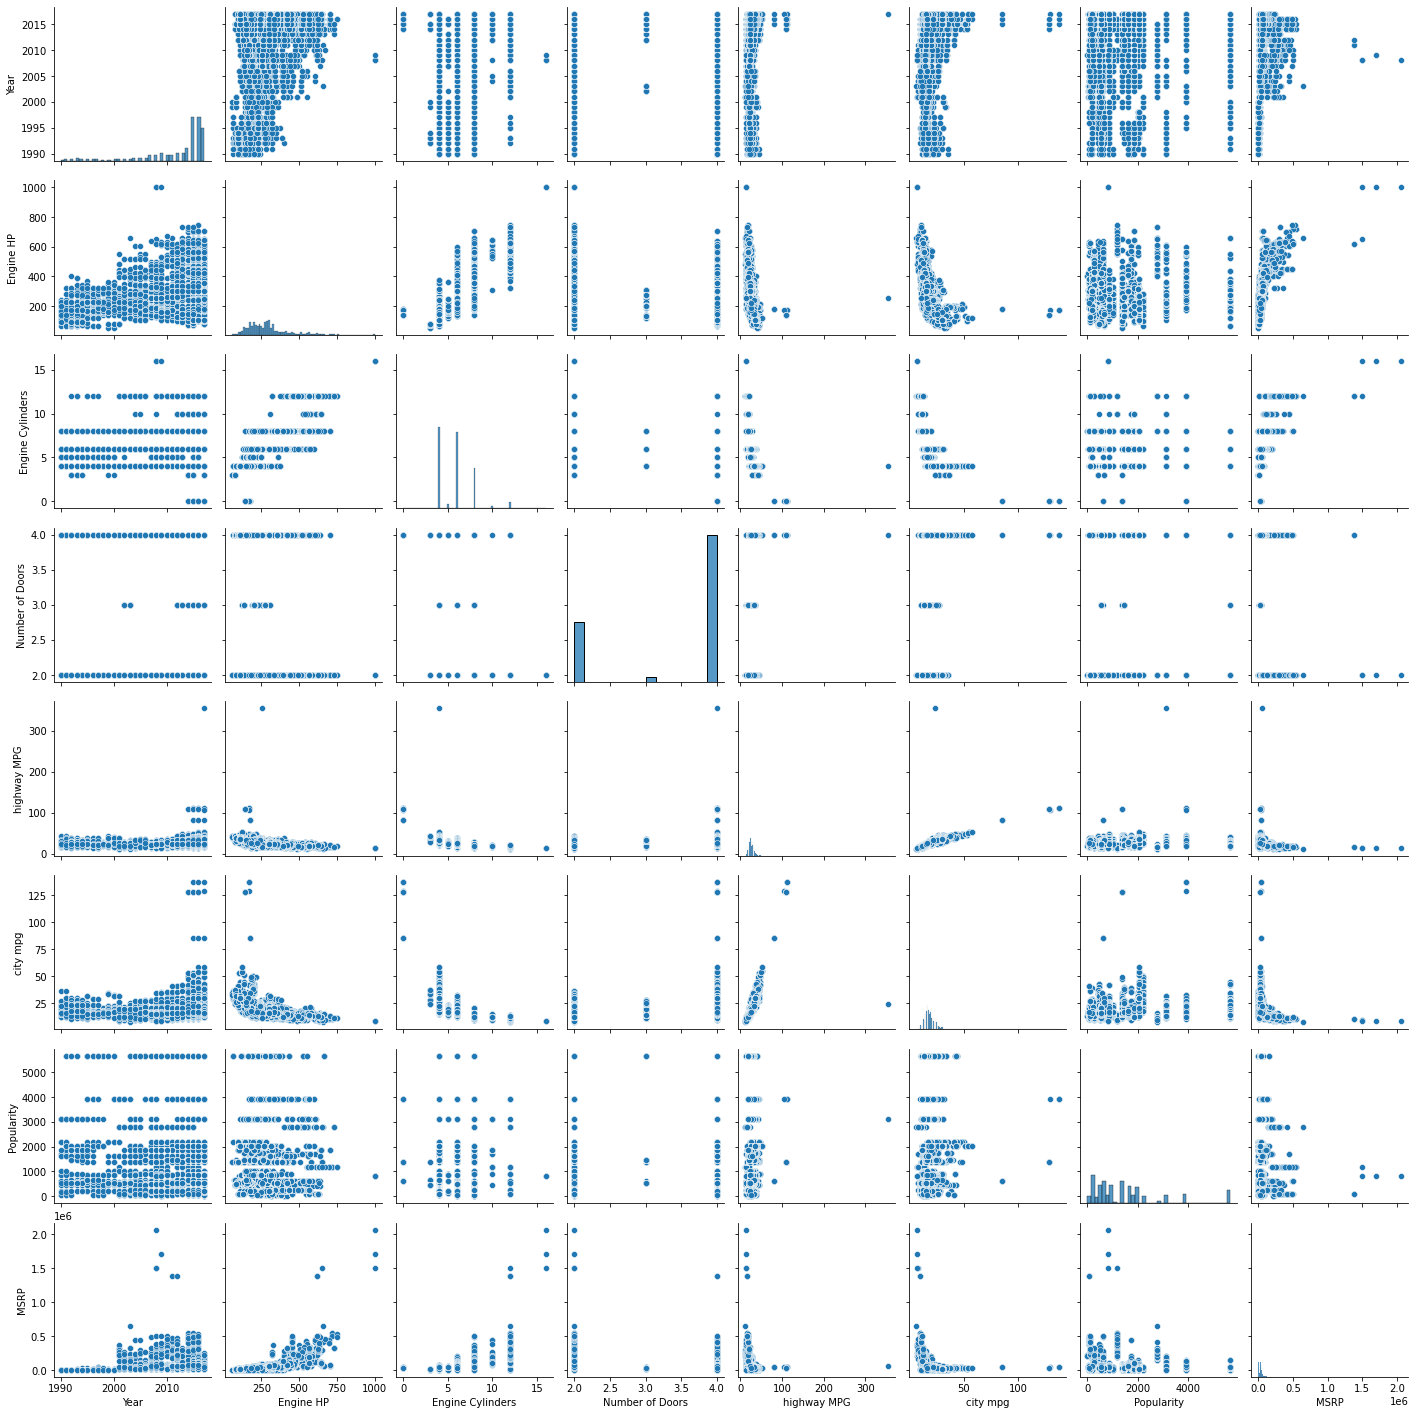

In [11]:
#Scatterplots for joint relationships and histogram for univariate distributions
sns.pairplot(data = df)

In [12]:
#let's view various Make of the cars
df['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'McLaren',
       'Maybach', 'Porsche', 'Toyota', 'Saab', 'GMC', 'Hyundai', 'Honda',
       'Cadillac', 'Bentley', 'Ford', 'Oldsmobile', 'Chevrolet', 'Dodge',
       'Lamborghini', 'Lincoln', 'Pontiac', 'Subaru', 'Volkswagen',
       'Spyker', 'Kia', 'Acura', 'Plymouth', 'Rolls-Royce', 'Maserati',
       'Lexus', 'Aston Martin', 'Land Rover', 'Lotus', 'Buick',
       'Infiniti', 'Scion', 'Genesis', 'Suzuki', 'HUMMER', 'Bugatti'],
      dtype=object)

In [13]:
fig = px.histogram(df, x = 'Model',
                   labels= {'Model':'Manufacturer'},
                   title = 'Model OF THE CAR',
                   color_discrete_sequence=['maroon'])
fig.show()

In [14]:
#let's view various Type of the cars
df['Model'].unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '5 Series Gran Turismo', '5 Series',
       '500-Class', '500', '500X', '550', '560-Class', '570S', '575M',
       '57', '599', '6 Series Gran Coupe', '6 Series', '600-Class',
       '612 Scaglietti', '62', '650S Coupe', '650S Spider', '7 Series',
       '718 Cayman', '740', '760', '780', '8 Series', '80', '850', '86',
       '9-2X', '9-3 Griffin', '9-3', '9-4X', '9-5', '9-7X', '9000', '900',
       '90', '911', '928', '940', '944', '960', '968', 'A3', 'A4 allroad',
       'A4', 'A5', 'A6', 'A7', 'A8', 'Acadia Limited', 'Acadia', 'Accent',
       'Accord Crosstour', 'Accord Hybrid', 'Accord Plug-In Hybrid',
       'Accor

In [21]:
df["Driven_Wheels"].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [22]:
fig = px.histogram(df, x = 'Driven_Wheels',
                   labels= {'Driven_Wheels':'Driven_Wheels'},
                   title = 'Driven Wheels of the car',
                   color_discrete_sequence=['BLACK'])
fig.show()

In [15]:
# Plot the make and type of the car
fig = px.histogram(df, x = 'Make',
                     color = 'Model',
                    labels= {'Make':'Manufacturer'},
                    title = 'MAKE OF THE CAR Vs Model')
fig.show()


<AxesSubplot:>

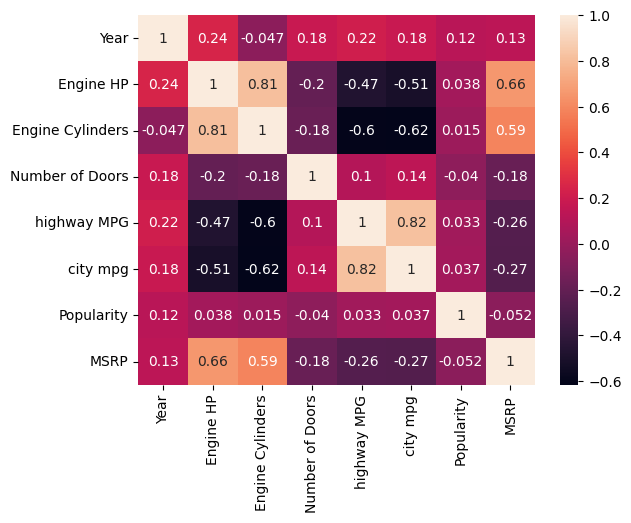

In [16]:
#Obtain the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

High correlation between :

- Engine cylinders & Engine HP
- highway mpg & City mpg

# Prepare the data before model training

In [24]:
#transform the text variable in dummies
df = pd.get_dummies(df, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'])

KeyError: "None of [Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',\n       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],\n      dtype='object')] are in the [columns]"

In [25]:
X = df.drop(['MSRP'], axis=1)
y = df['MSRP']

In [26]:
X = np.array(X)
y = np.array(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
#print the shape 
print("The input training dataset has",X_train.shape
    , "\nThe input testing dataset has",X_test.shape
    ,"\nThe output training dataset has", y_train.shape
    ,"\nThe output testing dataset has", y_test.shape)

The input training dataset has (6467, 873) 
The input testing dataset has (1617, 873) 
The output training dataset has (6467,) 
The output testing dataset has (1617,)


# Train and evaluate a Multiple Linear Regression

In [103]:
LinearRegression_Model = LinearRegression()
LinearRegression_Model.fit(X_train, y_train)

LinearRegression()

In [106]:
# calculating the accuracies
print("Training Accuracy :",LinearRegression_Model.score(X_train,y_train))
print("Testing Accuracy :",LinearRegression_Model.score(X_test,y_test))

Training Accuracy : 0.9860116100854803
Testing Accuracy : 0.8550062238641074


c:\Users\33646\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

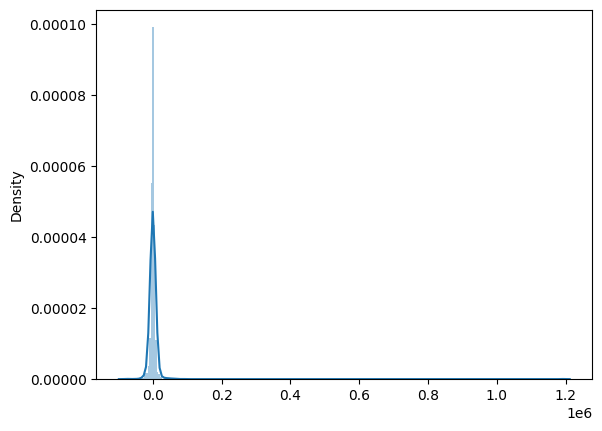

In [121]:
y_pred = LinearRegression_Model.predict(X_test)
sns.distplot((y_test-y_pred),bins=300)
#center the graph around 0

In [114]:
print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.8550062238641074
Mean Squared Error :  943336254.2814068
MAE :  5049.467447964504
RSME :  30713.779550576426


In [117]:
results_df = pd.DataFrame(data=[["Linear Regression", LinearRegression_Model.score(X_train,y_train),LinearRegression_Model.score(X_test,y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),math.sqrt(mean_squared_error(y_test,y_pred))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RSME'])

results_df

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RSME
0,Linear Regression,0.986012,0.855006,0.855006,9.433363e+08,5049.467448,30713.779551


# Train and evaluate a Decision Tree and Random Forest Model

In [122]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [123]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.840945288764256

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
RandomForest_Model = RandomForestRegressor(n_estimators=5, max_depth = 5)
RandomForest_Model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [126]:
accuracy_RandomForest = RandomForest_Model.score(X_test, y_test)
accuracy_RandomForest

0.7926139965641871

# Train an XG-Boost regressor model

In [ ]:
#create a function with the model and the data to predict with xg boost and ann
def xgboost_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2_Score : ", r2_score(y_test,y_pred))
    print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
    print("MAE : ",mean_absolute_error(y_test,y_pred))
    print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))
    results_df = pd.DataFrame(data=[["Xgboost", model.score(X_train,y_train),model.score(X_test,y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),math.sqrt(mean_squared_error(y_test,y_pred))]], 
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RSME'])
    results_df
    return results_df

xgboost_model(XGBRegressor(), X_train, X_test, y_train, y_test)

In [127]:
import xgboost as xgb

In [31]:
#use grid search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300, 400, 500], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}
#gridsearch cv
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [10, 50, 100, 200, 300, 400, 500]})

In [130]:
accuracy_XGBoost = grid_search.score(X_test, y_test)
accuracy_XGBoost

0.8759521945456075

# Compare Models and calculate regression KPIs

c:\Users\33646\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used car ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

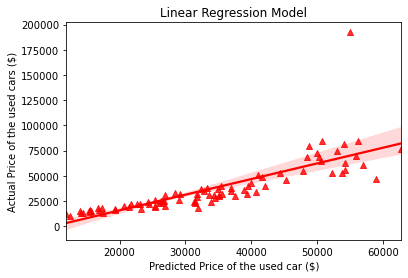

In [95]:
y_predict_linear = LinearRegression_Model.predict(X_test)
fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used car ($)", ylabel = "Actual Price of the used cars ($)" )

In [96]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), '.3f'))
MSE = mean_squared_error(y_test, y_predict_linear)
MAE = mean_absolute_error(y_test, y_predict_linear)
r2 = r2_score(y_test, y_predict_linear)

In [97]:
print('RMSE = ', RMSE,"\nMSE = ", MSE,"\nMAE = ", MAE,"\nr2 = ", r2)

RMSE =  17552.6 
MSE =  308093756.0028799 
MAE =  7486.104900056396 
r2 =  0.5331193154562981


c:\Users\33646\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'RandomForest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used car ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

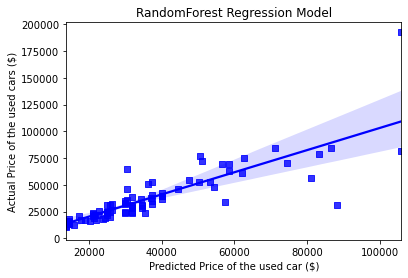

In [98]:
y_predict_RandomForest = RandomForest_Model.predict(X_test)
fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "RandomForest Regression Model", xlabel = "Predicted Price of the used car ($)", ylabel = "Actual Price of the used cars ($)" )

In [99]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), '.3f'))
MSE = mean_squared_error(y_test, y_predict_RandomForest)
MAE = mean_absolute_error(y_test, y_predict_RandomForest)
r2 = r2_score(y_test, y_predict_RandomForest)

In [100]:
print('RMSE = ', RMSE,"\nMSE = ", MSE,"\nMAE = ", MAE,"\nr2 = ", r2)

RMSE =  14128.636 
MSE =  199618360.93588316 
MAE =  7143.87145742784 
r2 =  0.6975013119046602


c:\Users\33646\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used car ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

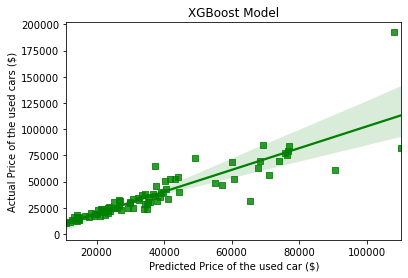

In [101]:
y_predict_XGBoost = model.predict(X_test)
fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "s")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used car ($)", ylabel = "Actual Price of the used cars ($)" )

In [102]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), '.3f'))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

In [103]:
print('RMSE = ', RMSE,"\nMSE = ", MSE,"\nMAE = ", MAE,"\nr2 = ", r2)

RMSE =  12495.864 
MSE =  156146624.65386638 
MAE =  6139.1326081031975 
r2 =  0.76337773295573


From the above analysis, we can conclude that the XGBoost is the best model to predict the price of the used car.

# Bibliographie :

https://www.coursera.org/projects/used-car-price-prediction-using-machine-learning-models

https://towardsdatascience.com/predicting-the-price-of-used-cars-891d13faf3fc

